<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Распределения-ежемесячных-платежей" data-toc-modified-id="Распределения-ежемесячных-платежей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Распределения ежемесячных платежей</a></span></li><li><span><a href="#Гистограммы-распределения" data-toc-modified-id="Гистограммы-распределения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Гистограммы распределения</a></span><ul class="toc-item"><li><span><a href="#Графики-для-активных-пользователей" data-toc-modified-id="Графики-для-активных-пользователей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Графики для активных пользователей</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Телеком: исследование оттока клиентов

# Описание задачи

Сравните распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. Для каждой группы посчитайте статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Постройте гистограммы распределения.

Сравните поведение клиентов этих двух групп. Для каждой постройте два любых графика, изображающих:

- долю пользователей телефонной связи;
- долю интернет-пользователей.

## Подготовка данных

In [1]:
#используемые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from io import BytesIO
import requests
spreadsheet_id = '1DMy0mQFCjoF8Nm9KeORJvgVegzRFCGFLd0vCwrJYqBI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
contact = pd.read_csv(BytesIO(r.content))
contact

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60


In [3]:
from io import BytesIO
import requests
spreadsheet_id = '1_HkTCfFJmoBOD2qxLQek8NCPntqQs-SmcgXB_CBCCEI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
internet = pd.read_csv(BytesIO(r.content))
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [4]:
from io import BytesIO
import requests
spreadsheet_id = '10czETvkCrFRMWbypFpMq0nhFWxyfofkxUs0TknbglJM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
personal = pd.read_csv(BytesIO(r.content))
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [5]:
from io import BytesIO
import requests
spreadsheet_id = '1kBDdDqr_H6JKC0Fwt9wbg64nNh-tVegqWgufD_RRI7A'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
phone = pd.read_csv(BytesIO(r.content))
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


## Подготовка данных

In [6]:
#формирование двух групп
data_on = contact.query('EndDate=="No"')
data_off = contact.query('EndDate!="No"')

print(data_on.info())
print()
print(data_off.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5174 non-null   object 
 1   BeginDate         5174 non-null   object 
 2   EndDate           5174 non-null   object 
 3   Type              5174 non-null   object 
 4   PaperlessBilling  5174 non-null   object 
 5   PaymentMethod     5174 non-null   object 
 6   MonthlyCharges    5174 non-null   float64
 7   TotalCharges      5163 non-null   float64
dtypes: float64(2), object(6)
memory usage: 363.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   BeginDate         1869 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              

## Распределения ежемесячных платежей

In [7]:
print('Числовое описание данных ежемесячных платежей для активных пользователей')
print()
print(data_on['MonthlyCharges'].describe())

Числовое описание данных ежемесячных платежей для активных пользователей

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [8]:
print('Числовое описание данных ежемесячных платежей для НЕ активных пользователей')
print()
print(data_off['MonthlyCharges'].describe())

Числовое описание данных ежемесячных платежей для НЕ активных пользователей

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64


Из приведенных выше данных видно, что:
1. Среднее значение ежемесячного платежа для активных пользователей составляет 61.27, для НЕ активных - 74.44.
2. Минимальное значение ежемесячного платежа для активных пользователей - 18.25, НЕ активных - 18.85.
3. Максимальное значение ежемесячного платежа для активных пользователей - 118.75, НЕ активных - 118.35.
4. Медианное значение для активных пользователей - 64.43, НЕ активных - 79.65.
5. Величина 25%-квартиля для активных пользователей - 25.1, НЕ активных - 56.15.
6. Величина 75%-квартиля для активных пользователей - 88.4, НЕ активных - 94.2.

## Гистограммы распределения 

AxesSubplot(0.125,0.125;0.775x0.755)


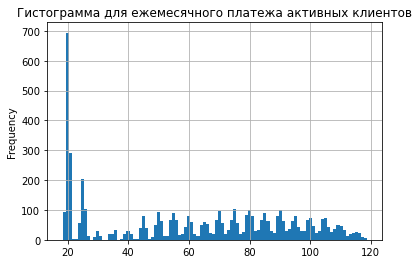

In [9]:
print(data_on['MonthlyCharges'].plot(kind='hist',title='Гистограмма для ежемесячного платежа активных клиентов', grid = True, bins=100))

AxesSubplot(0.125,0.125;0.775x0.755)


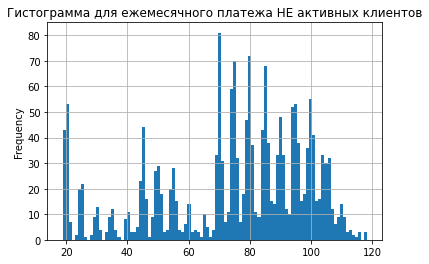

In [10]:
print(data_off['MonthlyCharges'].plot(kind='hist',title='Гистограмма для ежемесячного платежа НЕ активных клиентов', grid = True, bins=100))

**Вывод**

1. Из активных пользователей самый большой пик около 20 денежных единиц (скорей всего основной пакет услуг).
2. Из НЕ активных клиентов большая часть, отказавшихся от услуг компании, платили больше 70 денежных единиц.

### Графики для активных пользователей

In [11]:
#определение доли пользователей телефонной связи
data_on_tel = data_on.merge(phone, how='left', on='customerID')
print(data_on_tel.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 5173
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5174 non-null   object 
 1   BeginDate         5174 non-null   object 
 2   EndDate           5174 non-null   object 
 3   Type              5174 non-null   object 
 4   PaperlessBilling  5174 non-null   object 
 5   PaymentMethod     5174 non-null   object 
 6   MonthlyCharges    5174 non-null   float64
 7   TotalCharges      5163 non-null   float64
 8   MultipleLines     4662 non-null   object 
dtypes: float64(2), object(7)
memory usage: 404.2+ KB
None


In [12]:
#кол-во отсутствующих значений
print(data_on_tel['MultipleLines'].isna().sum())

512


**Вывод**

Следовательно, из активных пользователей 512 не пользуются услугами телефоной связи.

In [13]:
#постороение графика
data_on_tel['MultipleLines'] = data_on_tel['MultipleLines'].replace('No', 1)
data_on_tel['MultipleLines'] = data_on_tel['MultipleLines'].replace('Yes', 1)
data_on_tel['MultipleLines'] = data_on_tel['MultipleLines'].fillna(0)

In [14]:
print(data_on_tel['MultipleLines'].value_counts())

1.0    4662
0.0     512
Name: MultipleLines, dtype: int64


Доля пользователей телефонной связи среди активных клиентов


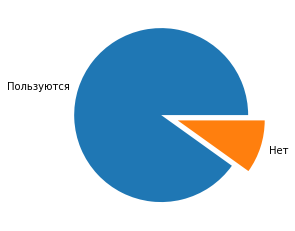

Доля пользователей телефонной связи среди активных клиентов: 90.1 %


In [15]:
y = np.array(data_on_tel['MultipleLines'].value_counts())
mylabels = ["Пользуются", "Не пользуются"]
myexplode = [0, 0.2]

print('Доля пользователей телефонной связи среди активных клиентов')
plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()
print('Доля пользователей телефонной связи среди активных клиентов:', round(((4662/5174)*100), 2),'%')

In [16]:
#определение доли интернет-пользователей
data_on_int = data_on.merge(internet, how='left', on='customerID')
print(data_on_int.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 5173
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5174 non-null   object 
 1   BeginDate         5174 non-null   object 
 2   EndDate           5174 non-null   object 
 3   Type              5174 non-null   object 
 4   PaperlessBilling  5174 non-null   object 
 5   PaymentMethod     5174 non-null   object 
 6   MonthlyCharges    5174 non-null   float64
 7   TotalCharges      5163 non-null   float64
 8   InternetService   3761 non-null   object 
 9   OnlineSecurity    3761 non-null   object 
 10  OnlineBackup      3761 non-null   object 
 11  DeviceProtection  3761 non-null   object 
 12  TechSupport       3761 non-null   object 
 13  StreamingTV       3761 non-null   object 
 14  StreamingMovies   3761 non-null   object 
dtypes: float64(2), object(13)
memory usage: 646.8+ KB
None


In [17]:
print('Количество пользователей без интернет услуг')
print(data_on_int['OnlineSecurity'].isna().sum())

Количество пользователей без интернет услуг
1413


In [18]:
data_on_int['OnlineSecurity'] = data_on_int['OnlineSecurity'].replace('No', 1)
data_on_int['OnlineSecurity'] = data_on_int['OnlineSecurity'].replace('Yes', 1)
data_on_int['OnlineSecurity'] = data_on_int['OnlineSecurity'].fillna(0)

In [19]:
print(data_on_int['OnlineSecurity'].value_counts())

1.0    3761
0.0    1413
Name: OnlineSecurity, dtype: int64


Доля пользователей интеренет услуг среди активных клиентов


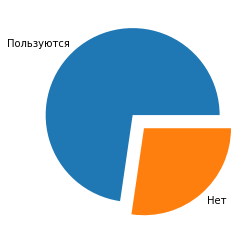


Доля пользователей интеренет услуг среди активных клиентов: 72.66 %


In [20]:
x = np.array(data_on_int['OnlineSecurity'].value_counts())
mylabels = ["Пользуются", "Не пользуются"]
myexplode = [0, 0.2]

print('Доля пользователей интеренет услуг среди активных клиентов')
plt.pie(x, labels = mylabels, explode = myexplode)
plt.show()
print()
print('Доля пользователей интеренет услуг среди активных клиентов:', round(((3761/5176)*100), 2),'%')

## Выводы 

На основании проведенной работы можно следать следующие выводы:

1. НЕ активные пользователи тратили на услуги больше. Об этом говорит и среднее, и медианной значение ежемесячных платежей. Следовательно, способы удержания клиентов следует направить на более платежеспособных клиентов.
2. Чаще всего покидают компанию клиенты, которые тратят более 70 денежных единиц.
3. Из анализа активных пользователей видно, что почти все пользователи (90%) пользуются телефонной связью и 73% пользуются интернетом.